In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [6]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [8]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [9]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with= engine)

In [10]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [11]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
recent_date

('2017-08-23',)

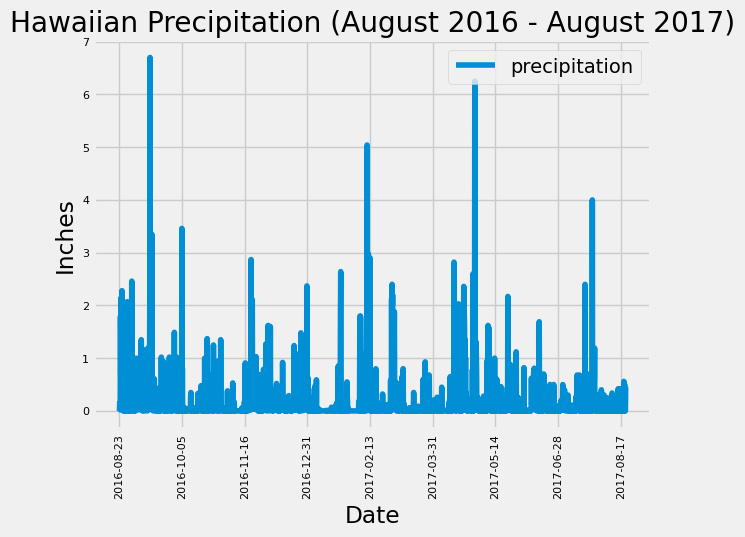

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
prev_last_date = dt.date(one_year.year, one_year.month, one_year.day)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_last_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns=["date", "precipitation"])

# Sort the dataframe by date
results_df.sort_values(by="date", inplace=True)

# Drop any N/A 
clean_results_df = results_df.dropna()

# Check the amount of total rows
#results_df

# Check the amount of total rows aster dropping the N/A
#clean_results_df

# Use Pandas Plotting with Matplotlib to plot the data
clean_results_df.plot('date', 'precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Hawaiian Precipitation (August 2016 - August 2017)")
plt.legend(["precipitation"], loc="upper right")
plt.xticks(rotation=90, size=8)
plt.yticks(size = 8)
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

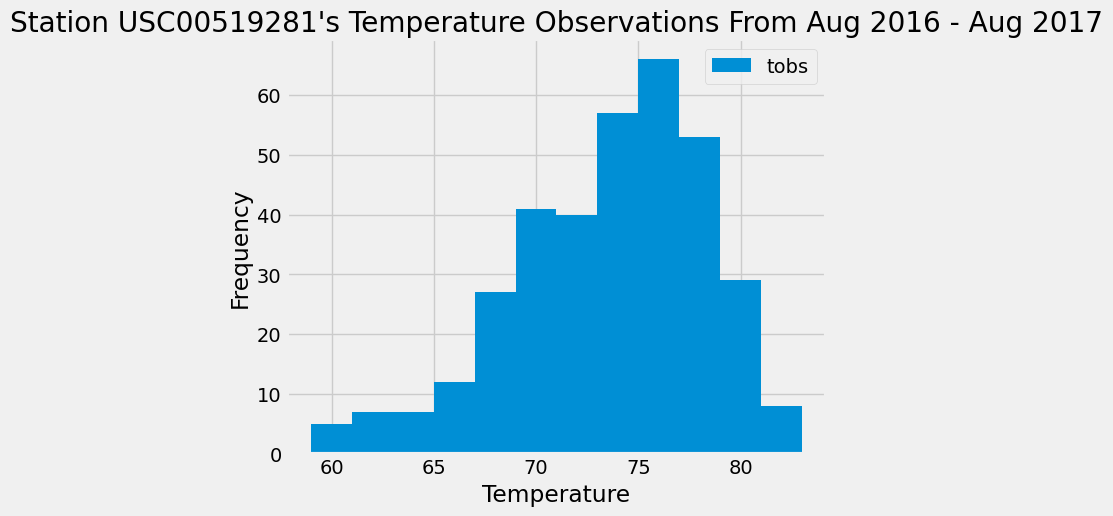

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
results = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").filter(Measurement.date>='2016-08-23').all()

# and plot the results as a histogram
station_tobs = pd.DataFrame(results, columns=["tobs"])
station_tobs.plot.hist(bins=12)
plt.tight_layout()
plt.title("Station USC00519281's Temperature Observations From Aug 2016 - Aug 2017")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [20]:
# Close Session
session.close()
